<a href="https://colab.research.google.com/github/arvieira/bootcamp_projeto_final/blob/main/notebooks/ProjetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from joblib import load
import IPython

IPython.display.HTML('https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/lib/capa.html')

#Capítulo 1: Introdução

Em dezembro de 2019, na cidade de Wuhan capital da provincia de Hubei na República Popular da China ocorreu um número de casos incomum de pneumonia.
Após o sequenciamento genético do vírus, foi constatado que se tratava de um novo tipo de coronavírus.
Grupos de médicos tentaram alertar a população sobre a nova ameaça de saúde que estava presente. 
No entanto, como se tratava de algo novo para a saúde local, houve um certo atraso até a percepção real da gravidade da situação e a comunicação à população.
Os casos em questão foram ligados ao mercado de comida marinha Wholesale Market próximo ao hospital que registrou os primeiros casos.
A suspeita era de que o suposto vírus tivesse passado do morcego para o homem e se espalhado tendo como primeiro foco o suposto mercado de comida.

Em janeiro de 2020, o sequenciamento genético do novo coronavírus foi terminado e compartilhado em uma iniciativa global para compartilhamento de dados genômicos de vírus influenza e coronavírus. 
No mês de março seguinte, a Organização Mundial de Saúde já havia declarado que se tratava de uma pandemia, atingindo países por todo o globo com diversos casos causando mortes.

O nome da doença causada pelo novo coronavirus encontrado a princípio na provincia de Hubei foi chamada de *Coronavirus Disease 2019* abreviada como COVID-19.
A causa dessa nova doença é uma síndrome respiratória aguda denominada *Severe Acute Respiratory Syndrome CoronaVirus 2* ou SARS-CoV-2.
A nova síndrome afeta os diferentes tipos de pessoas de formas variadas, sendo a maioria delas desenvolvendo sintomas respiratórios leves ou moderados.
Além desses sintomas, o paciente pode apresentar febre, tosse seca e cansaço.
Sintomas menos comuns podem também ser apresentados, tais como dores pelo corpo, dor de garganta, diarréia, conjuntivite, dores de cabeça, perda de olfato e paladar, erupções na pele e descoloração dos dedos.
No entanto, há sintomas mais severos como dificuldades para respirar, dor ou pressão no peito e perda de fala ou movimento, casos esses em que o soccoro médico se faz urgente (WIKIPEDIA, 2021).

Até o momento não há tratamento conhecido e eficaz para o COVID-19.
A maioria dos pacientes se recupera sem a necessidade de qualquer tratamento ou intervenção médica, sendo necessário apenas repouso.
Pessoas mais idosas e portadores de comorbidades, tais como problemas cardiovasculares, diabétes, doenças respiratórias crônicas, cancer, entre outras, geralmente apresentam quadros mais graves da doença.
Para os casos mais graves, há a necessidade de auxílio respiratório e tratamentos de suporte a vida como os realizados em Centros de Terapia Intensiva (CTI).
Nos quadros mais severos, se faz necessário o uso de ventilação mecânica para o paciente fornecendo-lhe suporte à vida e ocupando leitos em CTIs.

A transmissão do vírus se dá de pessoa para pessoa por gotículas de saliva expelidas durante a fala, a respiração ou espirros.
No atual cenário, há a circulação de diferentes cepas do vírus, sendo umas mais ou menos contagiosas e outras mais ou menos agressivas.
Para a prevenção da infecção é necessário que a população mundial adote algumas medidas de etiqueta e cuidados relacionados às formas de transmissão da doença.
As seguintes medidas se mostraram eficientes para conter o avanço e o espalhamento da doença por regiões (OMS, 2021):
- Higienizar regularmente as mãos com água e sabão ou alcool 70%.
- Manter distanciamento social de no mínimo 1 metro.
- Evitar tocar o próprio rosto.
- Cobrir a boca e o nariz quando for espirrar ou tossir.
- Ficar em casa no caso de apresentar os sintomas descritos aqui.
- Evitar fumar ou realizar outras atividades que prejudiquem os pulmões.
- Praticar atividades físicas respeitando as medidas indicadas anteriormente.

Levando em consideração a alta transmissibilidade do vírus em tela; o avanço do número de casos em geral e dos mais graves com a necessidade do uso de ventilação mecânica em CTIs; gerou-se uma grande pressão sobre os sistemas de saúde por todo o mundo.
Há uma grande procura por leitos de CTI e por aparelhos médico-hospitalares para a realização da ventilação citada, chamados popularmente de respiradores.
Nesse cenário, a necessidade de se identificar o mais rápido possível o paciente que terá apenas sintomas leves, diferenciando aqueles que irão evoluir para os quadros mais graves e necessitar de leitos em CTIs é de extrema importância.

Este trabalho apresenta o desenvolvimento de modelos de *Machine Learning* com a utilização de dados clínicos e de internação de pacientes do Hospital Sírio-Libanês da cidade de São Paulo no Brasil (SÍRIO-LIBANES, 2021).
Essa proposta se diferencia dos demais trabalhos encontrados na literatura por estudar uma forma de diferenciar pacientes que precisarão de CTIs nas primeiras horas de atendimento, baseado em diversos dados clínicos de exames.
Busca-se prever a necessidade real de leitos intensivos para não sobrecarregar o sistema de saúde com pacientes que não precisariam verdadeiramente da internação, mas que ao mesmo tempo não indique uma alta para aqueles que poderão acabar não tendo o tratamento adequado a tempo, vindo a óbito.


# Capítulo 2: Referencial Teórico

O referencial teórico do trabalho possui a funcionalidade de ambientar a pesquisa entre outros trabalhos que têm sido desenvolvidos no meio acadêmico.
Para a construção dessa base de conhecimento para o desenvolvimento desse trabalho foi utilizada a ferramenta de busca Google Scholar (https://scholar.google.com.br).
Os termos *using machine learning of clinical data covid 19* foram utilizados como *string* de busca durante as pesquisas.
Foram obtidos 157.000 resultados relacionados aos termos procurados. 
A pesquisa teve como foco somente os 10 primeiros resultados contidos na primeira página da ferramenta de busca, levando em consideração que estes são ordenados por relevância.
Foi utilizado como critério de seleção para os artigos aqueles que possuíssem em suas pesquisas o tema de modelos de *Machine Learning*, sendo usados para analisar dados clínicos de pacientes de COVID-19.
Quatro artigos acadêmicos foram selecionados para compor a base teórica para este trabalho:
- Using machine learning of clinical data to diagnose COVID-19: a systematic review and meta-analysis (LI, Wei Tse et al., 2020).
- Prediction of criticality in patients with severe Covid-19 infection using three clinical features: a machine learning-based prognostic model with clinical data in Wuhan (YAN, Li et al., 2020).
- Machine-Learning Approaches in COVID-19 Survival Analysis and Discharge-Time Likelihood Prediction Using Clinical Data (NEMATI et al., 2020).
- Machine Learning-Based Prediction of COVID-19 Severity and Progression to Critical Illness Using CT Imaging and Clinical Data (PURKAYASTHA, Subhanik et al., 2021)

Cada um dos trabalhos selecionados foram lidos na íntegra e seus conteúdos anotados para a composição desse referêncial.
De uma forma geral, os trabalhos na área de criação de modelos de *Machine Learning* para previsões com a utilização de dados clínicos segue um procedimento de pesquisa em comum.

##2.1 Procedimento de Pesquisa

Os trabalhos pesquisados iniciam com a apresentação dos dados e a forma como estes foram tratados para poder servir de base para o modelo de *Machine Learning*.
A esse processo é dado o nome de limpeza dos dados e ele engloba avaliar os diferentes campos que compõem cada uma das linhas do conjunto de dados.
Estes campos são divididos segundo o seu tipo em categóricos e contínuos.
Campos categóricos são aqueles que representam divisões do pacientes em categorias como faixas etárias.
Campos contínuos são aqueles que possuem uma medida acerca de algum ponto do paciente, como por exemplo o nível de *Lactic Dehydrogenase (LDH)*.
Para dados incompletos é elaborada uma estratégia para o preenchimento ou o descarte dos mesmos.

A segunda etapa apresentada nos trabalhos é a retirada de campos que são correlacionados com outros campos da própria base de dados, o que poderia inviesar o modelo para determinada previsão.
A forma como se percebe a correlação entre os campos depende do tipo de cada um deles.
Quando dois campos contínuos são avaliados por sua correlação alguns trabalhos utilizam o teste de correlação de Spearman.
Tratando-se de um campo contínuo e um categórico é utilizado o teste de Kruskal-Wallis.
Para correlações entre campos categóricos foi utilizado o teste do Qui-quadrado.
Há de se ressaltar que a eliminação de correlação remove apenas uma das variáveis analisadas, deixando a outra para compor a base para o modelo.

O próximo processo aplicado pelos trabalhos é a escolha do algoritmo do modelo de *Machine Learning*.
Os trabalhos selecionados para este referencial teórico, em sua maioria, utiliza o algoritmo *eXtreme Gradient Boosting (XGBoost)*.
No entanto, os trabalhos constumam comparar diversos algoritmos para poder realizar uma avaliação dos resultados e concluir o melhor a ser utilizado.
Dentre os algoritmos apresentados pelos trabalhos se encontram:
- *eXtreme Gradient Boosting (XGBoost) (Single-tree e Multi-tree)*
- *LASSO Regression*
- *RIDGE Regression*
- *Random Forest*
- *Decision Tree*
- *Bosting*
- *Bayesian*
- *Linear Discriminant Analysis*
- *k-nearest Neighbors*
- *Generalized Linear Models*
- *IPCRidge*
- *CoxPH e Coxnet*
- *Stagewise*
- *Componentwise*
- *Fast Fast*
- *Support Vector Machines (SVM)*
- *Kernel SVM*

Após a criação do modelo, os trabalhos dividem a base de dados em 3 grupos de dados: treino, validação e teste. 
A proporção apresentada em (PURKAYASTHA, Subhanik et al., 2021) é de sete partes para treino, uma para validação e duas para teste.
A forma como a base é dividida importa para os resultados dos modelos criados, uma vez que as partes devem estar balanceadas e a forma de escolha deve ser aleatória.
Com os dados divididos os trabalhos apresentam uma validação cruzada do modelo utilizando a parte de treino e validação dividida em *folds* que vão alternando de papel a cada iteração de validação realizada.

Modelos de *Machine Learning* possuem parâmetros especiais na sua criação que podem ser alterados gerando melhores ou piores resultados nas previsões.
O nome dado a esses parâmetros é "Hiperparâmetros".
Dependendo do tipo de algoritmo utilizado para o modelo pode-se ter diversos parâmetros e a sintonia fina desses manualmente se torna inviável.
Em (LI, Wei Tse et al., 2020) é apresentado um algoritmo para a otimização computacional destes hiperparâmetros utilizando procedimentos específicos juntamente com métricas de avaliação dos resultados.
O trabalho citado utiliza uma otimização Bayesiana com oito passos de exploração aleatória seguida de cinco iterações para o algoritmo XGBoost, utilizando como hiperparâmetros alvos para a sintonia o *max_depth*, *gamma*, *learning_rate* e *n_estimators*. 

O passo final na conclusão dos trabalhos é a avaliação das previsões dos modelos criados com a utilização de métricas estatísticas.
A métrica mais utilizada nos trabalhos foi a Área Sob a Curva (*Area Under the Curve - AUC*), sendo a curva citada a *Receiver Operating Characteristic - ROC*.
A curva ROC possui em seu eixo y (vertical) a taxa de verdadeiros positivos  e no eixo x (horizontal) a taxa de falsos positivos do modelo a ser avaliado.
A geração da curva ocorre variando o limiar de classificação do modelo e medindo as duas taxas citadas.
Modelos que apresentam uma curva partindo do ponto (0, 0), indo a (1, 0) e depois a (1, 1) possuem a maior área sob a curva (AUC) possível que é 1.
Uma AUC igual a 1 indica que o modelo só possui verdadeiros positivos e não possui falsos positivos, ou seja, é um modelo que acerta muitasprevisões.
A Figura 1 a seguir apresenta um desenho esquemático de uma curva ROC.

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/Curva_ROC.png" width = 70%>
  <p align="center">Figura 1 - Desenho esquemático de curva ROC (https://pt.wikipedia.org/wiki/Característica_de_Operação_do_Receptor)</p>
</p>

##2.2 Curva ROC, Matriz de Confusão, Precision, Recall e F1-Score

A curva ROC apresenta em seus eixos duas taxas que são derivadas da matriz de confusão do modelo que é composta pelos valores de Verdadeiro Positivo (VP), Verdadeiro Negativo (VN), Falso Positivo (FP) e Falso Negativo (FN).
Os conceitos de VP e VN são as medidas do quanto o modelo previu e acertou um caso realmente verdadeiro ou falso, respectivamente.
Quanto aos conceiros FP e FN, trata-se de erros do modelo sendo a primeira aquela que o modelo previu ser verdadeiro e a segunda previu ser falso.

Em (LI, Wei Tse et al., 2020), (YAN, Li et al., 2020) e (PURKAYASTHA, Subhanik et al., 2021) são utilizadas outras métricas como *Precision*, *Recall* e *F1-Score*.
A métrica de *Precision* mede o quanto preciso ou quanta acurácia possui o modelo.
Ela é medida com a seguinte fórmula $VP/(VP + FP)$.
Ou seja, de tudo que o modelo indicou que era verdadeiro, quanto ele realmente acertou. 
Esta métrica é indicada para casos em que o custo do FP é alto e queremos minimizá-lo.

A métrica de *Recall* mede o quanto sensível ou quanta sensibilidade possui o modelo.
A fórmula para o cálculo do *Recall* é $VP = (VP + FN)$.
Nesse caso, do quantitativo total de casos verdadeiros, quantos o meu modelo acertou.
Esta métrica é utilizada para avaliar um modelo quando o falso negativo é muito custoso e deve ser evitado.
A métrica *F1-Score* consiste na média harmônica entre a *Precision* e a *Recall*, servindo para quando se busca um equilíbrio entre as duas ou quando a distribuição de resultados é desbalanceada (SHUNG, KOO PING, 2021).

Em (NEMATI et al., 2020) e (PURKAYASTHA, Subhanik et al., 2021) foi apresentada uma quarta métrica chamada *Concordance Index (C-Index)*.
A métrica em tela mede o quanto a previsão acertou o ordenamento das previsões em relação ao que ocorreu.
Supondo três pacientes, o primeiro internou com 1 semana, o segundo com 2 e o terceiro com 3.
Se o modelo previr que o primeiro irá internar com 5 semanas, o segundo com 10 e o terceiro com 15, ainda assim o *C-Index* será 1 porque a ordem entre os pacientes se manteve.
No caso oposto, se o modelo previr que o primeiro paciente internará com 5 semanas, o segundo com 3 e o terceiro com 1, o valor do *C-Index* será 0 porque é a ordem exatamente inversa (Figura 2).

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/C_index.png" width = 70%>
  <p align="center">Figura 2 - Exemplificação C-Index</p>
</p>

##2.3 Trabalhos Relacionados

Apesar dos trabalhos analisados utilizarem o processo geral semelhante ao descrito anteriormente, cada um apresentava nuances diferentes quanto ao objetivo das pesquisas e à forma como foi realizada.
Em (LI, Wei Tse et al., 2020), foram utilizados dados clínicos para a construção de um modelo de *Machine Learning* para a diferenciação de casos de Influenza e COVID-19.
A motivação do trabalho se deu pela falta de disponibilidade de testes para os pacientes, o que resulta em um tratamento errado para pacientes.
Da base de dados analisada, foram utilizados as variáveis de idade, sexo, nível de neutrófilos, leucócitos e linfócitos, resultados de raio-x e tomografia, conjunto de sintomas (diarréia, febre, tosse, dor de garganta, náusea, cansaço, temperatura do corpo, doenças renais e diabetes.
Como resultado, obteve um modelo *XGBoost* com AUC de 0.99, o qual foi comparado com *LASSO Regression* com 0.963, *Ridge Regression* com 0.966 e *RandomForest* com 0.953.

Em (YAN, Li et al., 2020), foram utilizados os dados dos hospitais da cidade de Wuhan para tentar prever a severidade que a infecção por COVID-19 terá.
O trabalho define como condição crítica quando um paciente entra em choque, necessita de ventilação mecânica ou é enviado ao CTI.
O modelo utilizado é o XGBoost e é indicado que o foram previstos 90% dos sobreviventes.

Em (NEMATI et al., 2020), o objetivo é criar um modelo de *Machine Learning* de modo a conseguir prever o tempo necessário para um paciente de COVID-19 deixar o hospital.
Uma comparação de uma série de modelos é apresentada (IPCRidge, COxPH e Coxnet, Stagewise, ComponentWise, Fast Fast, SVM e Kernel SVM), utilizando como métrica o *C-Index*.
O autor dispõe de uma base de dados com os seguintes campos ID, idade, sexo, Data de início dos sintomas, Data da hospitalização, Data da confirmação de COVID-19, Tempo para ir a óbito ou ter alta, Estado de saída (óbito ou alta), Sintomas, Histórico de doenças crônicas, Histórico de viagens e Localização.
No entanto, mesmo com todos os campos citados, são utilizados somente os campos idade, sexo, datas e saída para a construção do modelo.
O trabalho apresenta conclusões importantes acerca dos dados, indicando que pacientes do sexo masculino possuem maiores chances de sair do hospital nos 15 primeiros dias.
Proporção esta invertendo para o sexo feminino nos 15 dias seguintes.

Em (PURKAYASTHA, Subhanik et al., 2021), é proposta a utilização de modelos de *Machine Learning* para prever a deterioração do estado de pacientes com COVID-19.
A pesquisa foi realizada com 981 pacientes com janelas de 3, 5 e 7 dias.
Este trabalho apresenta um grande diferencial dos demais por utilizar técnicas de *Deep Learning* baseados em uma rede neural convolucional profunda para mapear resultados de tomografias em dados para compor a base utilizada para o modelo.
Como metodologia, o pulmão do paciente foi dividido em cinco áreas e cada uma recebia um *score* entre 0 e 5.
O total para cada paciente variava de 0 a 25 pontos.
Além dos dados das tomografias, o estudo disponha de dados clínicos distribuídos em três grandes grupos: Demográficos, Comorbidades e relativos a datas.
Como resultados, o estudo apresentou que os campos *Lactate Dehydrogenase (LDH), D-dimmer e Direct Bilirubin* influenciaram de maneira expressiva.
Foi indicado que a média de idade dos pacientes que evoluíram pior era mais alta e que a média de tempo entre a admissão e a piora foi entre 0 e 4 dias.
A utilização de dados clínicos juntamente com as tomografias se mostrou como a melhor base de dados, tendo os melhores modelos apresentado os resultados de 0.897, 0.933 e 0.927 para 3, 5 e 7 dias de janelas, respectivamente.

##2.4 Diferencial do Trabalho

Este trabalho apresenta uma proposta de criação de um modelo de *Machine Learning* para a previsão da necessidade de leitos em CTI para pacientes de COVID-19.
A base de dados a ser utilizada é aquela disponibilizada pelo Hospital Sírio-Libanes da cidade de São Paulo, Brasil (SÍRIO-LIBANES, 2021).
Nesta base, são apresentados dados clínicos de pacientes de COVID-19 anonimizados para a não identificação de pessoas, nem das doenças em questão.
Serão utilizados os dados clínicos referentes ao início dos sintomas da doença, desejando prever se aquele paciente irá necessitar de atendimento em CTI.
O objetivo do trabalho é prover uma forma de melhor dimensionar o sistema de saúde e instalações em hospitais, evitando a sobrecarga do sistema ou gastos desnecessários.
O procedimento utilizado será semelhante ao apresentado neste Capítulo para diversos modelos, com posterior comparação utilizando métricas estatísticas.

#Capítulo 3: Proposta

##3.1 Análise Exploratória e Limpeza de dados

Este trabalho propõe a realização de uma análise exploratória da base de dados anonimizada de pacientes de COVID-19, provida pelo Hospital Sírio-Libanês de São Paulo, Brasil.
A análise terá como objetivo limpar e preparar os dados para a construção de modelos de *Machine Learning* para previsão de severidade de pacientes e demanda de tratamento em CTI.
A referida análise se encontra em notebook a parte, podendo ser acessada pelo endereço eletrônico https://github.com/arvieira/bootcamp_projeto_final/blob/main/notebooks/AnaliseExploratoria.ipynb.

Durante as análises, foi observado que a base possui 231 colunas contendo dados de pacientes.
Dentre essas, a primeira identificava o paciente, a última identificava se o mesmo necessitou de tratamento intensivo em CTI e a penúltima identificava a janela de tempo em horas desde a admissão do paciente.
Além dessas três colunas, havia outras 228 colunas que representavam 54 características de pacientes dividida em 3 colunas com informações demográficas, 9 relativas a comorbidades e doenças pré-existentes, 36 de exames sangíneos e 6 de sinais vitais.
O valor de $(231-54) = 177$ consituem médias, medianas, valores máximos e mínimos, diferença de máximo/mínimo e diferença relativa à média.
Quanto às linhas, a base de dados apresentava um conjunto de linhas para cada paciente, sendo cada uma representativa de uma janela horária da evolução do mesmo.

Conforme exposto, a base de dados continha uma série de colunas que foram calculadas em termos de outras, o que torna a correlação delas extremamente altas.
Isto posto, essas colunas de descrição de dados foram descartadas da base para a criação do modelo.
Em seguida, foi identificado que a base de dados possuía a falta de alguns valores de dados de pacientes.
Logo, para a utilização da mesma, foi necessário adotar uma técnica de preenchimento dos dados faltantes.
Como se tratava de resultados de exames e dados demográficos variando em janelas de poucas horas, os melhores valores a serem utilizados para o complemento é o próximo ou o último válido após um intervalo. 
Para tanto, a base de dados foi dividida em colunas que representavam variáveis categóricas e continuas, sendo realizado o preenchimento em seguida com métodos de *backfill* e *forwardfill*.

Para a utilização na construção do modelo, a utilização de dados numéricos é necessária.
Foram identificadas duas variáveis categóricas que possuíam valores do tipo *String* e deveriam ser mapeadas em categorias numéricas.
As duas variáveis citadas eram "AGE_PERCENTIL" e "WINDOW", que foram mapeados em números e a relação foi guardada em um dicionário para construção de visualizações posteriores.

O site que disponibilizava a base de dados utilizada chamado *Kaggle* possui uma descrição sumária da base realizada por seus construtores.
A referida descrição indicava que os dados referentes às janelas que o paciente possuísse o valor 1 na coluna "ICU" deveriam ser descartados porque não eram prestáveis para o treinamento de modelos.
Nesse caso, era necessário descartar essas linhas da base e manter a relação de que aquele paciente foi encaminhado a tratamento intensivo em CTI.
Foi realizado um filtro de modo a remover as referidas linhas e marcar as janelas restantes dos pacientes que tiveram as linhas removidas com o valor 1 na coluna 'ICU'.
Desse modo, permaneceu na base todas as janelas anteriores ao envio para CTI com o valor de 1 para 'ICU'.
Pacientes que não tiveram a necessidade de CTI possuíram o valor de 0 na coluna 'ICU' em todas as linhas de suas representantes de suas janelas.
Com isso, foi obtido um conjunto de *snapshots* de janelas de evolução de pacientes e o resultado final se houve a necessidade de CTI, não importando mais a quem pertencesse cada uma das janelas.

Foi realizada ainda um cálculo da matriz de correlação das variáveis. 
O objetivo era buscar algum valor alto de correlação entre variáveis diferentes mas que se relacionavam por motivos clínicos.
Após as análises, foi identificado que a coluna "HEMOGLOBIN_MEAN" possuía uma alta correlação e deveria ser removida da base para não enviesar os dados.

Por fim, levando em consideração os resultados obtidos pelos trabalhos selecionados na literatura indicados no Capítulo 2 desse trabalho, foi realizada uma análise das variáveis ditas importantes.
Foram construídas visualizações em gráficos barras e de linhas, relacionando o número de pacientes que necessitaram de tratamento em CTI com as *features*: "AGE_PERCENTIL", "GENDER", "LACTATE_MEAN", "DIMER_MEAN", "BILLIRUBIN_MEAN" e "LINFOCITOS_MEAN". 
Foi confirmado que pacientes mais idosos realmente possuem uma tendência de evoluir pior na doença (Figura 3).
Foi constatada um desbalanceamento entre os sexos masculino e feminino em relação à evolução do quadro.
No entanto, não foi possível constatar qual evolui pior devido à anonimização dos dados da base utilizada (Figura 4).
Quanto aos demais índices, não foi possível retirar conclusões precisas acerca dos dados, uma vez que os dados parecem ser muito sensíveis e a normalização entre -1 e 1 realizada pelos fornecedores da base pode ter resultado na perda dessa precisão (Figuras 5, 6, 7, 8, 9, 10, 11 e 12).

Por fim, os dados foram salvos em formato "csv" e utilizados no notebook de criação do modelo.

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/idade.png" width = 70%>
  <p align="center">Figura 3 - Distribuição de pacientes de COVID-19 com necessidade de CTI por faixa etária.</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/sexo.png" width = 70%>
  <p align="center">Figura 4 - Distribuição de pacientes de COVID-19 com necessidade de CTI por gênero (anonimizado)</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/lactato0a2.png" width = 70%>
  <p align="center">Figura 5 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média de Lactato janela de 0 a 2 horas</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/lactato12mais.png" width = 70%>
  <p align="center">Figura 6 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média Lactato janela acima de 12 horas</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/dimer0a2.png" width = 70%>
  <p align="center">Figura 7 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média de Dimer janela de 0 a 2 horas</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/dimer12mais.png" width = 70%>
  <p align="center">Figura 8 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média de Dimer janela acima de 12 horas</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/bilirubin0a2.png" width = 70%>
  <p align="center">Figura 9 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média de Bilirrubina janela de 0 a 2 horas</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/bilirubin12mais.png" width = 70%>
  <p align="center">Figura 10 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média de Bilirrubina janela acima de 12 horas</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/linfocitos0a2.png" width = 70%>
  <p align="center">Figura 11 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média de Linfócitos janela de 0 a 2 horas</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/linfocitos12mais.png" width = 70%>
  <p align="center">Figura 12 - Distribuição de pacientes de COVID-19 com necessidade de CTI por média de Linfócitos janela acima de 12 horas</p>
</p>


##3.2 Criação do Modelo de *Machine Learning*

A criação do modelo de *Machine Learning* utilizou a base de dados tratada na seção anterior, importando-a com a biblioteca Pandas do Python.
A referida construção se encontra em notebook a parte, podendo ser acessada pelo endereço eletrônico https://github.com/arvieira/bootcamp_projeto_final/blob/main/notebooks/CriacaoDoModelo.ipynb.
Foi construída uma classe chamada "ModelTester" para realizar todas as operações com a base de dados, criação e comparação de modelos.
A *Application Programming Interface* (API) da classe se encontra descrita a seguir:

---

ModelTester
> <i>class </i><b>ModelTester(<i>models, data, n=0, n_splits=0, n_repeats=0</i>)</b>

Divide base de dados, realiza cross-validation, cria e treina modelos, avalia performace e faz otimização de hiperparâmetros para *Machine Learning*

<table>
  <tr>
    <td>
      <b>Parâmetros:</b>
    </td>
    <td>
      <b>model: lista de dicionários, contendo nome e objeto do modelo.</b><br>
      Cada um dos dicionários presentes na lista desse parâmetro é utilizado<br> para identificar um modelo a ser trabalhado pela classe. Dessa forma,<br> pode-se avaliar diversos tipos de algoritmos de <i>Machine Learning</i> <br>de uma só vez.
      <br><br>
      <b>data: pandas.DataFrame contendo a base de dados para a criação do modelo.</b><br>
      Essa base de dados será dividida em treino, validação e teste, sendo<br>
      sendo utilizada para todas as operações da classe.
      <br><br>
      <b>n: int, default=0.</b><br>
      Caso se queira executar n execuções do modelo com divisões aleatórias <br>estratificadas do modelo e medir AUC e acurácia. Se zero, não faz as n<br> execuções do modelo.
      <br><br>
      <b>n_splits: int, default=0.</b><br>
      Usado juntamente com o próximo parâmetro, será utilizado para indicar o <br>número de recortes que serão utilizados na base de dados para a execução <br>de cross-validate nos modelos obtidos. Se zero, não faz a cross-validate.
      <br><br>
      <b>n_repeats: int, default=0.</b><br>
      Usado juntamente com o parâmetro anterior, será utilizado para indicar o<br> número de vezes que as etapas serão repetidas no cross-validate. Se zero,<br> não faz o cross-validate.
    </td>
  </tr>
</table>

<b>Métodos</b>
<table>
<tr>
  <td>
  run()
  </td>
  <td>
  Executa as n rodadas do modelo ou o cross-validate dependendo<br> dos parâmetros da construção do objeto. Imprime na tela as métricas <br>de cada um dos modelos avaliados para comparação.
  </td>
</tr>
<tr>
  <td>
  get_best_model()
  </td>
  </td>
  <td>
  Deve ser utilizado após o método run(). Retorna o melhor modelo <br>encontrado nos testes.
  </td>
</tr>
<tr>
  <td>
  hiperparameters_search(name, model, params[, n_iter])
  </td>
  </td>
  <td>
  Realiza a otimização do modelo de <i>Machine Learning</i>, buscando pelos <br>hiperparâmetros de maneira aleatória ou em grid de acordo com o universo<br> de parâmetros fornecidos. Caso o n_iter seja definido, realizará uma busca <br>do tipo aleatória. Caso constrário, será do tipo grid.
  </td>
</tr>
</table>

<b>Exemplo</b>
```
models = [
          {
              'name': 'DummyClassifier',
              'model': DummyClassifier(),
          },
          {
              'name': 'LogisticRegression',
              'model': LogisticRegression(max_iter=10000)
          },
          {
              'name': 'DecisionTreeClassifier',
              'model': DecisionTreeClassifier()
          },
          {
              'name': 'XGBoostBinaryClassifier',
              'model': xgb.XGBClassifier(objective="binary:logistic", random_state=42)
          }
]

tester = ModelTester(models, data, n=10, n_splits=5, n_repeats=10)
tester.run()
best_model = tester.get_best_model()

grid_params = {
    "gamma": [0, 0.09, 1],
    "learning_rate": [0, 0.4, 1],
    "max_depth": [1, 6, 10], 
    "n_estimators": [10, 15, 20],
}
grid_best_model = tester.hiperparameters_search(best_model['name'], best_model['model'], grid_params)

random_params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
random_best_model = tester.hiperparameters_search(best_model['name'], best_model['model'], random_params, n_iter=3)
```

---

Durante as análises da proposta deste trabalho, foram avaliados os modelos de algoritmos de *Machine Learning*: *DummyClassifier*, *LogisticRegression*, *DescisionTreeClassifier* e *XGBoostBinaryClassifier*.
A escolha dos algoritmos passou pelo conteúdo presente nos trabalhos selecionados da literatura e pelos exemplos indicados no "Bootcamp Data Science Aplicada 2" da empresa Alura.
Como resultados preliminares, foi obtido:
- DummyClassifier
  - Executando 10 vezes:
    - AUC Médio: 0,504
    - Intervalo de confiança a 95%: 0.455 a 0.554
  - Cross-validate:
    - AUC médio: 0.497
    - Intervalo de confiança a 95%: 0.437 a 0.557
- LogisticRegression
  - Executando 10 vezes:
    - AUC Médio: 0,858
    - Intervalo de confiança a 95%: 0.825 a 0.891
  - Cross-validate:
    - AUC médio: 0.860
    - Intervalo de confiança a 95%: 0.819 a 0.900
- DecisionTreeClassifier
  - Executando 10 vezes:
    - AUC Médio: 0,871
    - Intervalo de confiança a 95%: 0.838 a 0.903
  - Cross-validate:
    - AUC médio: 0.869
    - Intervalo de confiança a 95%: 0.821 a 0.918
- XGBoostBinaryClassifier:
  - Executando 10 vezes:
    - AUC Médio: 0,959
    - Intervalo de confiança a 95%: 0.945 a 0.974
  - Cross-validate:
    - AUC médio: 0.958
    - Intervalo de confiança a 95%: 0.934 a 0.982

Assim como indicado nos trabalhos encontrados na literatura, o algoritmo XGBoost apresentou um desempenho superior aos demais nos testes.
O modelo XGBoostBinaryClassifier foi o selecionado pela classe ModelTester como o melhor.
Foram realizadas duas buscas por hiperparâmetros para o modelo selecionado, sendo a primeira no formato Grid e a segunda aleatória.
O espaço de hiperparâmetros para a busca em Grid foi:
- gamma: [0, 0.09, 1]
- learning_rate: [0, 0.4, 1]
- max_depth: [1, 6, 10]
- n_estimators: [10, 15, 20]

Para a busca aleatória foram utilizadas 3 interações com o seguinte universo de parâmetros:
- colsample_bytree: uniform(0.7, 0.3)
- gamma: uniform(0, 0.5)
- learning_rate: uniform(0.03, 0.3)
- max_depth: randint(2, 6)
- n_estimators: randint(100, 150)
- subsample: uniform(0.6, 0.4)

Como resultados, a busca em Grid indicou que o melhor modelo era aquele com os hiperparâmetros gamma = 0, learning_rate = 0.4, max_depth = 10 e n_estimators = 20, produzindo um AUC médio de 0.976 com um intervalo de confiança a 95% de 0.957 a 0.995.
Quanto a busca aleatória, o melhor modelo indicado possui os seguintes hiperparâmetros colsample_bytree = 0.8478292141990216, gamma = 0.20199896624003705, learning_rate = 0.295222614531939, max_depth = 4, n_estimators = 147 e subsample = 0.6881861322455585.
O resultado produzido pelo modelo encontrado pela busca aleatória foi de um AUC médio de 0.980 com um intervalo de confiança a 95% de 0.964 a 0.997.

Isto posto, pode-se afirmar que o melhor modelo encontrado por este trabalho apresentou um AUC médio de 0.980, o que representa um valor alto para modelos de *Machine Learning*.
Logo, a partir de uma janela com dados clínicos de um paciente de COVID-19, o modelo tem altíssima probabilidade de prever corretamente se aquele paciente necessitará ou não de atendimento de terapia intensiva em CTI.

#Capítulo 4: Conclusão

Este trabalho teve como objetivo a criação de um modelo de *Machine Learning* para a previsão da evolução do quadro de pacientes de COVID-19.
A base de dados utilizada foi fornecida pelo Hospital Sírio-Libanês da cidade de São Paulo no Brasil.
Foi realizada uma pesquisa sistemática na literatura por trabalhos semelhantes, buscando apresentar um cenário mais adequado do estado da arte para a elaboração do trabalho.
Como resultado, foram encontrados algoritmos mais adequados e possíveis dados clínicos/demográficos que influenciariam a evolução dos pacientes de COVID-19.
Os dados clínicos encontrados foram analisados, indicando que pessoas mais idosas tendem a ter uma pior evolução da doença.
Do mesmo modo, foi encontrado um desbalanceamento entre gêneros, mas não foi possível identifica qual gênero evolui pior em virtude da anonimização dos dados da base utilizada.
Quanto aos demais dados clínicos, não foi possível retirar conclusões.
Suspeita-se de que a normalização dos dados entre -1 e 1, realizada pela fonte dos dados, acabou por suavizar parâmetros de variação muito sensível.

A criação do modelo utilizou o algoritmo chamado "eXtreme Gradient Boosting (XGBoost)", o qual retornou os melhores resultados nos trabalhos analisados.
Foi realizada a comparação do modelo obtido pelo algoritmo citado com outros 3 modelos: "DummyClassifier", "LogisticRegression" e "DecisionTreeClassifier".
Em seguida, foi realizada uma otimização de hiperparâmetros do melhor modelo com duas buscas, sendo a primeira em Grid e a segunda aleatória.
Como resultado, foi obtido um modelo com as seguintes métricas:
- AUC Médio: 0.980
- Desvio padrão: 0.008
- Intervalo de confiança a 95%: 0.964 a 0.997

Em seguida, o modelo foi salvo em arquivo para sua utilização quando necessário.
No trecho de código a seguir, a título de exemplo, o modelo é carregado, treinado e realiza uma previsão de testes.
Uma matriz de confusão e um relatório de *Precision*, *Recall* e *F1-score* são emitidos e constam a seguir.
Pode-se apontar um *Recall* de 0.94 para o índice 1, o que é de extremamente otimista para o uso do modelo em questão, uma vez que essa métrica representa aqueles pacientes que precisariam de CTI, mas foi previsto pelo modelo o contrário.

In [11]:
data = pd.read_csv('https://github.com/arvieira/bootcamp_projeto_final/blob/main/data/ready_data.csv?raw=true')
data = data.drop(['Unnamed: 0', 'PATIENT_VISIT_IDENTIFIER', 'WINDOW'], axis=1)

np.random.seed(234451)
shuffle_data = data.sample(frac=1).reset_index(drop=True)
x = shuffle_data.drop(['ICU'], axis=1)
y = shuffle_data['ICU']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

modelo = load('/content/drive/MyDrive/Trabalho/CienciaDeDados/Bootcamp/Modulo05/ProjetoFinal/modelos/RandomBestModel.joblib')
modelo.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8478292141990216,
              gamma=0.20199896624003705, learning_rate=0.295222614531939,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              n_estimators=147, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.6881861322455585, verbosity=1)

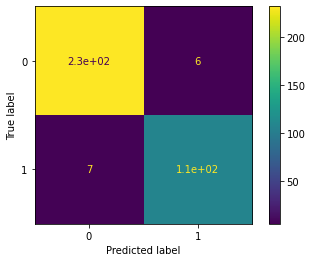

In [12]:
plot_confusion_matrix(modelo, x_test, y_test)

In [13]:
print(classification_report(y_test, modelo.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       238
           1       0.95      0.94      0.94       115

    accuracy                           0.96       353
   macro avg       0.96      0.96      0.96       353
weighted avg       0.96      0.96      0.96       353



#Referências Bibliográficas

WIKIPEDIA, **COVID-19 pandemic**. 2021. Disponível em: https://en.wikipedia.org/wiki/COVID-19_pandemic

OMS, **Coronavirus**. 2021. Disponível em: https://www.who.int/health-topics/coronavirus

SÍRIO-LIBANES, **COVID-19 - Clinical Data to assess diagnosis. Sírio-Libanês data for AI and Analytics by Data Intelligence Team**. 2021. Disponível em: https://www.kaggle.com/S%C3%ADrio-Libanes/covid19

LI, Wei Tse et al. **Using machine learning of clinical data to diagnose COVID-19: a systematic review and meta-analysis**. BMC medical informatics and decision making, v. 20, n. 1, p. 1-13, 2020.

YAN, Li et al. **Prediction of criticality in patients with severe Covid-19 infection using three clinical features: a machine learning-based prognostic model with clinical data in Wuhan**. MedRxiv, 2020.

NEMATI, Mohammadreza; ANSARY, Jamal; NEMATI, Nazafarin. **Machine-learning approaches in COVID-19 survival analysis and discharge-time likelihood prediction using clinical data**. Patterns, v. 1, n. 5, p. 100074, 2020.

PURKAYASTHA, Subhanik et al. **Machine learning-based prediction of COVID-19 severity and progression to critical illness using CT imaging and clinical data**. Korean Journal of Radiology, v. 22, 2021.

SHUNG, KOO PING; **Accuracy, Precision, Recall or F1?**. 2021. Disponível em: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9